In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization aesthetics
sns.set(style="whitegrid")

In [27]:
# Define the tickers
dbc_ticker = 'DBC'
cpi_ticker = 'CPILFESL'  # Consumer Price Index for All Urban Consumers: All Items Less Food & Energy
oil_ticker = 'CL=F'

# Fetch the data for the past 5 years
dbc_data = yf.download(dbc_ticker, start='2019-01-01', end='2024-01-01')['Adj Close']
oil_data = yf.download(oil_ticker, start='2019-01-01', end='2024-01-01')['Adj Close']

# For CPI, we'll use monthly data from the Federal Reserve Economic Data (FRED)
# Download the data from FRED from: https://fred.stlouisfed.org/series/CPILFESL
cpi_data = pd.read_csv('CPILFESL.csv', parse_dates=['DATE'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [28]:
cpi_data.set_index('DATE', inplace=True)
cpi_data = cpi_data['CPILFESL']

In [31]:
# Resample DBC and oil data to monthly frequency to match CPI
dbc_monthly = dbc_data.resample('MS').last()
oil_monthly = oil_data.resample('MS').last()

# Combine the datasets into a single DataFrame
combined_df = pd.concat([dbc_monthly, oil_monthly, cpi_data], axis=1)
combined_df.columns = ['DBC', 'Oil', 'CPI']
combined_df.dropna(inplace=True)

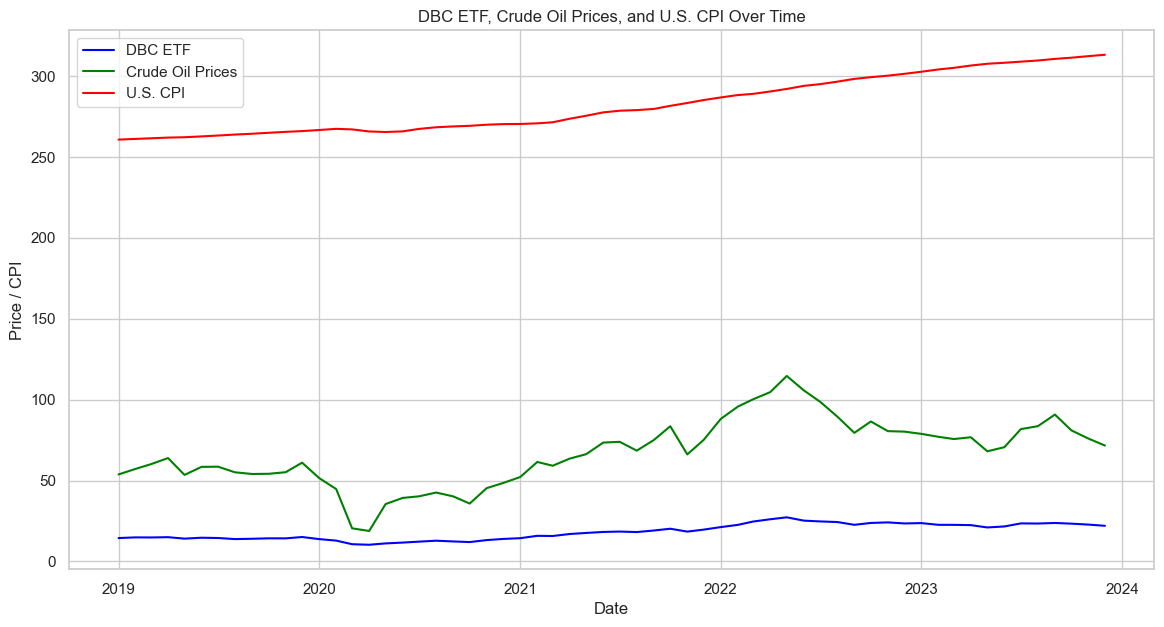

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, combined_df['DBC'], label='DBC ETF', color='blue')
plt.plot(combined_df.index, combined_df['Oil'], label='Crude Oil Prices', color='green')
plt.plot(combined_df.index, combined_df['CPI'], label='U.S. CPI', color='red')
plt.title('DBC ETF, Crude Oil Prices, and U.S. CPI Over Time')
plt.xlabel('Date')
plt.ylabel('Price / CPI')
plt.legend()
plt.show()

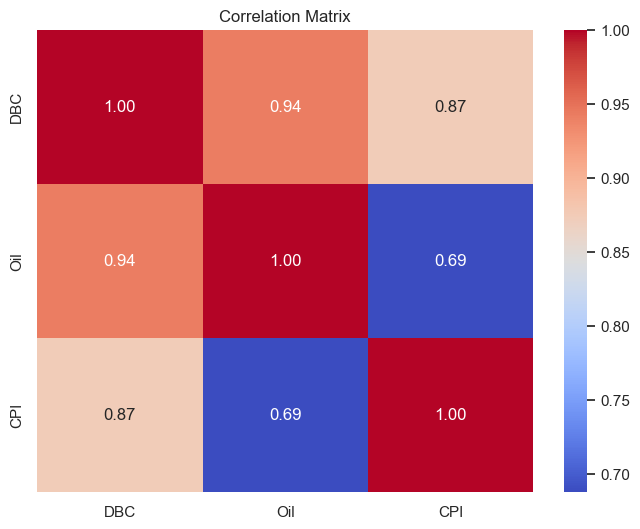

In [33]:
# Calculate the correlation matrix
corr_matrix = combined_df.corr()

# Display the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

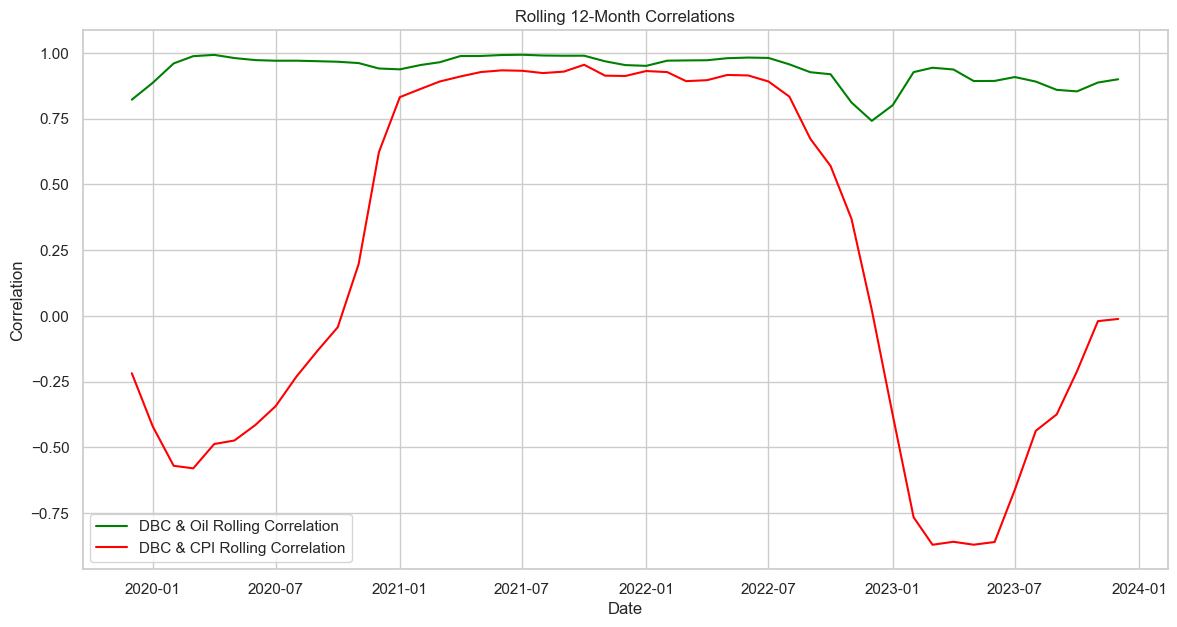

In [34]:
# Calculate rolling correlations with a 12-month window
rolling_corr_oil = combined_df['DBC'].rolling(window=12).corr(combined_df['Oil'])
rolling_corr_cpi = combined_df['DBC'].rolling(window=12).corr(combined_df['CPI'])

# Plot the rolling correlations
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, rolling_corr_oil, label='DBC & Oil Rolling Correlation', color='green')
plt.plot(combined_df.index, rolling_corr_cpi, label='DBC & CPI Rolling Correlation', color='red')
plt.title('Rolling 12-Month Correlations')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()